In [2]:

import pandas as pd
from typing import Callable
import matplotlib.pyplot as plt
import numpy as np
from numpy import array as arr
import skopt as sk
test_read= pd.read_csv('../data/output/aggregated/flow_stats.csv')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (25, 2) + inhomogeneous part.

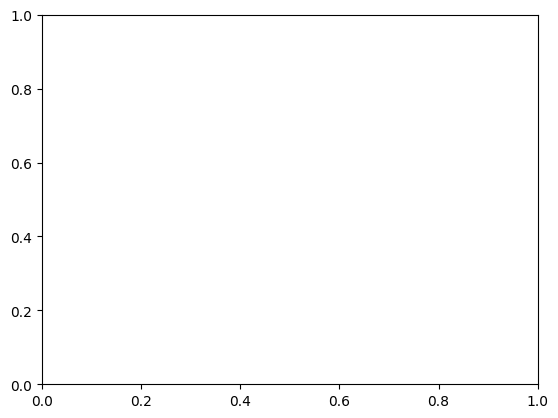

In [4]:
# 32-01
# 32-06
# 26-03
# Set the x-axis and y-axis data
x = test_read['angle_']
y = test_read.groupby('join_field')['join_field']

# Create the plot
plt.plot(x, y)
plt.xlabel('Angle')
plt.ylabel('Join Field')
plt.title('Trees Plot')

# Show the plot
plt.show()



In [14]:
import pandas as pd
import numpy as np
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
import sys

print(sys.path)

sys.path.append('/code/code/canopyHydrodynamics/')
print(sys.path)


# test_read= pd.read_csv('../data/output/aggregated/flow_stats.csv')
# print('here')

data= pd.read_csv('../data/output/aggregated/OptiSf.csv')

# Load your data
# data = pd.read_csv('../data/output/aggregated/OptSf.csv')


# List of tree codes you're optimizing for
tree_codes = ['Zse', 'Lst', 'Apl', 'Bpa', 'Nsy', 'Gdi', 'Uam', 'Cja', 'Ure', 'Coc', 'Aru', 'Tco']

# Define the space of angles, one for each tree code
angle_space = [Real(-0.5, 0.5, name=f"angle_{code}") for code in tree_codes]

# Define the objective function that calculates the negative correlation to minimize
@use_named_args(angle_space)
def objective(**angles):
    combined_s_data = pd.Series(dtype=float)
    combined_r_data = pd.Series(dtype=float)

    for code in tree_codes:
        angle = angles[f"angle_{code}"]
        s_col = f"{code}-Y"
        r_col = f"{code}-R"

        # Filter data for the specific angle
        angle_data = data[(data['A'] >= angle - 0.01) & (data['A'] <= angle + 0.01)]

        if not angle_data.empty:
            s_value = angle_data[s_col].dropna()
            r_value = angle_data[r_col].dropna()

            if not s_value.empty and not r_value.empty:
                combined_s_data = pd.concat([combined_s_data, s_value])
                combined_r_data = pd.concat([combined_r_data, r_value])

    if len(combined_s_data) > 1 and len(combined_r_data) > 1:
        corr = np.corrcoef(combined_r_data, combined_s_data)[0, 1]
        return -corr  # Minimize the negative correlation
    else:
        return 0  # Neutral value if insufficient data

# Perform the optimization
result = gp_minimize(objective, angle_space, n_calls=50, random_state=0)

# Results
best_corr = -result.fun  # Best correlation found
best_angles = result.x   # Best angles found

print("Best correlation:", best_corr)
print("Best angles:", best_angles)

Best correlation: 1.0
Best angles: [-0.10721520389917016, 0.33607876353737776, -0.16260383958273156, 0.1481718720511973, -0.13175846015945197, 0.4571551589530466, -0.35964921958735485, 0.3700872583584366, -0.026391954726289413, 0.30091075197964445, 0.020477479551204936, 0.1788795301189604]

['/code/code/canopyHydrodynamics/scripts', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/code/code/canopyHydrodynamics/venv/lib/python3.10/site-packages', '/code/code/canopyHydrodynamics/', '/code/code/canopyHydrodynamics/', '/code/code/canopyHydrodynamics/', '/code/code/canopyHydrodynamics/', '/code/code/canopyHydrodynamics/', '/code/code/canopyHydrodynamics/']
['/code/code/canopyHydrodynamics/scripts', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/code/code/canopyHydrodynamics/venv/lib/python3.10/site-packages', '/code/code/canopyHydrodynamics/', '/code/code/canopyHydrodynamics/', '/code/code/canopyHydrodynamics/', '/code/code/canopyHydrodynamics/', '/code/code/canopyHydrodynamics/', '/code/code/canopyHydrodynamics/', '/code/code/canopyHydrodynamics/']
Best correlation: 1.0
Best angles: [-0.10721520389917016, 0.33607876353737776, -0.16260383958273156, 0.1481718720511973, -0.13175846015945197, 0.45

In [15]:
print(tree_codes)
# print("Best angles:", best_angles)
print("Best angles:", best_angles)

['Zse', 'Lst', 'Apl', 'Bpa', 'Nsy', 'Gdi', 'Uam', 'Cja', 'Ure', 'Coc', 'Aru', 'Tco']
Best angles: [-0.10721520389917016, 0.33607876353737776, -0.16260383958273156, 0.1481718720511973, -0.13175846015945197, 0.4571551589530466, -0.35964921958735485, 0.3700872583584366, -0.026391954726289413, 0.30091075197964445, 0.020477479551204936, 0.1788795301189604]
